In [1]:
import pandasql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('http://bit.ly/dwp-data-movies-sample')
ratings = pd.read_csv('http://bit.ly/dwp-data-ratings-sample')
bike = pd.read_csv('http://bit.ly/dwp-data-bike')
survey = pd.read_csv('http://bit.ly/dwp-data-survey')

In [3]:
ratings = pd.read_csv('http://bit.ly/dwp-data-ratings-sample')

In [4]:
df_movies = movies
df_ratings = ratings
df_bike = bike
df_survey = survey

## SQL

#### Case

In [5]:
query = """
        SELECT
            CASE
                WHEN rating < 4 THEN 'low_rating'
                ELSE 'high_rating'
            END AS rating_category,
            COUNT(*) AS total
        FROM
            df_ratings
        GROUP BY
            CASE
                WHEN rating < 4 THEN 'low_rating'
                ELSE 'high_rating'
            END
        """

result = pandasql.sqldf(query)

result

,rating_category,total
0,high_rating,7
1,low_rating,3


In [6]:
# Task: buat dataframe seperti di atas tetapi menggunakan syntax pure pandas

# Membuat kolom baru (rating_category) berdasarkan kolom rating
# 1. Change Value DataFrame
# - Define function
# - Apply function
def convert_rating(row):
    if row['rating'] < 4:
        return 'low rating'
    return 'high rating'

df_ratings['rating_category'] = df_ratings.apply(convert_rating, axis=1)

# 2. Group by ...
df_ratings.groupby('rating_category', as_index=False)['rating'].count()

,rating_category,rating
0,high rating,7
1,low rating,3


#### Join

pd.merge(df1, df2, left_on, right_on)

In [7]:
query = """
        SELECT
            a.userId,
            a.rating,
            b.movieId,
            b.title
        FROM
            df_ratings AS a
        LEFT JOIN
            df_movies AS b ON a.movieId = b.movieId
        """

result = pandasql.sqldf(query)

result

,userId,rating,movieId,title
0,1,4.0,1.0,Toy Story (1995)
1,1,4.0,3.0,Grumpier Old Men (1995)
2,5,4.0,1.0,Toy Story (1995)
3,6,4.0,2.0,Jumanji (1995)
4,6,5.0,3.0,Grumpier Old Men (1995)
5,6,3.0,NaN,None
6,7,4.5,1.0,Toy Story (1995)
7,8,4.0,2.0,Jumanji (1995)
8,14,3.0,NaN,None
9,15,2.5,1.0,Toy Story (1995)


#### Having
- Filter setelah group by dilakukan

In [8]:
query = """
        SELECT
            userId,
            COUNT(*) AS total_ratings
        FROM
            df_ratings
        GROUP BY
            userId
        HAVING
            total_ratings > 1
        """

result = pandasql.sqldf(query)

result

,userId,total_ratings
0,1,2
1,6,3


#### Sub Query

In [9]:
query = """
        SELECT
            userId,
            movieId
        FROM
            (SELECT
                *
            FROM
                df_ratings) AS sub_query
        """

result = pandasql.sqldf(query)

result

,userId,movieId
0,1,1
1,1,3
2,5,1
3,6,2
4,6,3
5,6,4
6,7,1
7,8,2
8,14,4
9,15,1


## Pandas for Visualization

In [10]:
total_per_country = df_survey.groupby('Country')['EdLevel'].count() \
                             .sort_values(ascending=False) \
                             .head(10)

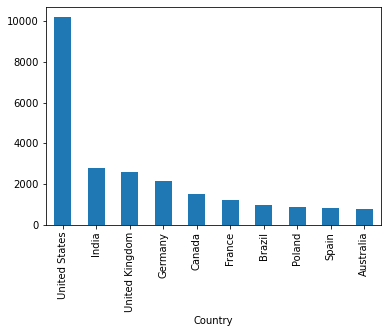

In [11]:
# bar

total_per_country.plot.bar()

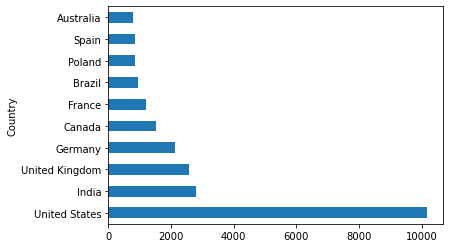

In [12]:
# barh

total_per_country.plot.barh()

In [13]:
salary_per_age = df_survey.groupby('Age')['ConvertedComp'].mean()

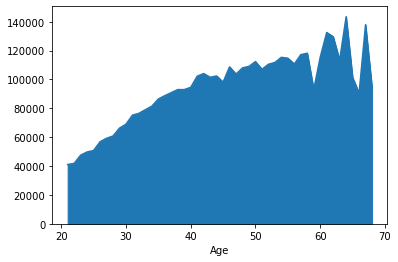

In [14]:
# area
salary_per_age.plot.area()

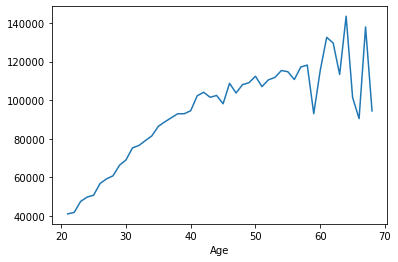

In [15]:
# line
salary_per_age.plot.line()

In [16]:
total_hobbyist = df_survey.groupby('Hobbyist')['Age'].count()

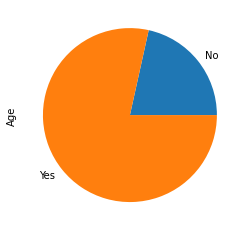

In [17]:
# pie
total_hobbyist.plot.pie()

In [18]:
salary_per_age_gender = df_survey.groupby(['Age', 'Gender'])['ConvertedComp'].mean()

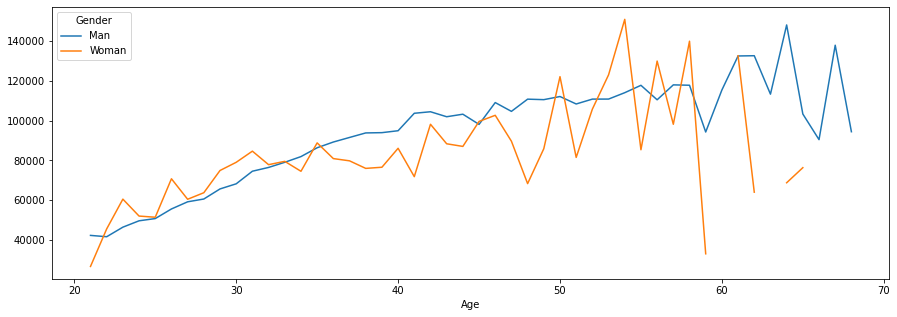

In [19]:
salary_per_age_gender.unstack().plot.line(figsize=(15,5))

#### Stacking

In [20]:
total_per_age_gender = df_survey.groupby(['Age', 'Gender'])['ConvertedComp'].count()

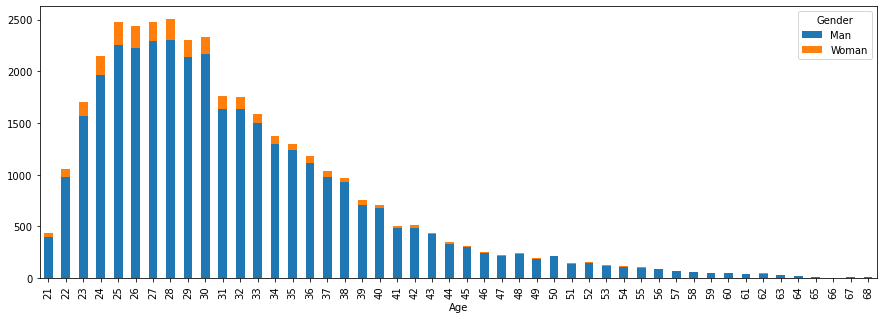

In [21]:
# Default Stacking

total_per_age_gender.unstack().plot.bar(figsize=(15,5), stacked=True)

In [22]:
total_per_age_gender

Age  Gender
21   Man        399
     Woman       32
22   Man        977
     Woman       74
23   Man       1566
               ... 
65   Man         13
     Woman        1
66   Man          5
67   Man          7
68   Man          6
Name: ConvertedComp, Length: 91, dtype: int64

In [27]:
total_per_age_gender_perc

Age  Gender
21   Man        92.575406
     Woman       7.424594
22   Man        92.959087
     Woman       7.040913
23   Man        91.793669
                  ...    
65   Man        92.857143
     Woman       7.142857
66   Man       100.000000
67   Man       100.000000
68   Man       100.000000
Name: ConvertedComp, Length: 91, dtype: float64

In [25]:
# Percentage Staking

total_per_age_gender_perc = total_per_age_gender.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

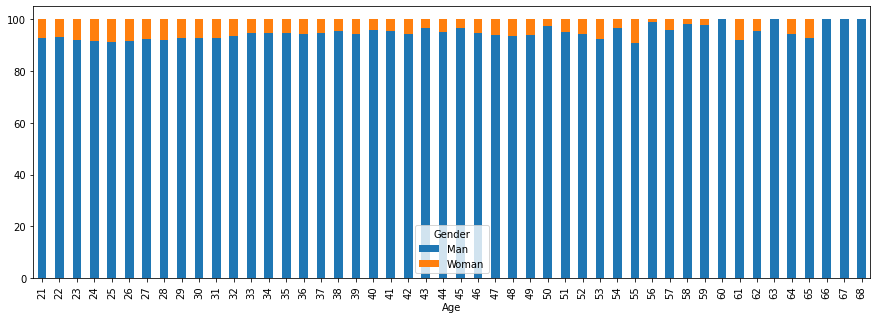

In [26]:
total_per_age_gender_perc.unstack().plot.bar(figsize=(15,5), stacked=True)

#### Subplot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5A30BA940>,
      dtype=object)

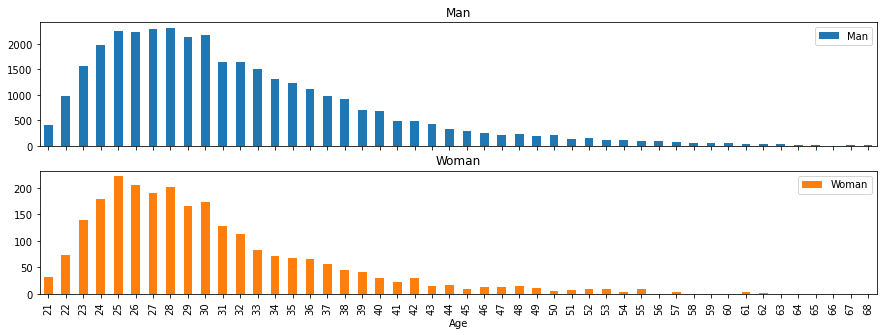

In [28]:
total_per_age_gender.unstack().plot.bar(figsize=(15,5), subplots=True)

### Latihan

In [29]:
# Menggunakan PandaSQL, coba kalian cari 'Age' yang memiliki total responden lebih dari 1000 orang

In [30]:
# 1. Group by - Having

query = """
        SELECT
            Age,
            COUNT(*) AS total_respondent
        FROM
            df_survey
        GROUP BY
            Age
        HAVING
            total_respondent > 1000
        """

result = pandasql.sqldf(query)

result

,Age,total_respondent
0,22,1051
1,23,1706
2,24,2145
3,25,2472
4,26,2434
5,27,2479
6,28,2503
7,29,2304
8,30,2334
9,31,1764


In [31]:
# 2. Subquery - Where

query = """
        SELECT
            *
        FROM
            (SELECT
                Age,
                COUNT(*) AS total_respondent
            FROM
                df_survey
            GROUP BY
                Age) AS a
        WHERE
            total_respondent > 1000
        """

result = pandasql.sqldf(query)

result

,Age,total_respondent
0,22,1051
1,23,1706
2,24,2145
3,25,2472
4,26,2434
5,27,2479
6,28,2503
7,29,2304
8,30,2334
9,31,1764


In [32]:
df_survey.head()

,Respondent,Age,Gender,Hobbyist,OpenSourcer,Employment,Country,EdLevel,UndergradMajor,OrgSize,YearsCode,JobSat,ConvertedComp,WorkWeekHrs,WorkRemote
0,4,22,Man,No,Never,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,3,Slightly satisfied,61000.0,80.0,Less than once per month / Never
1,9,23,Man,Yes,Once a month or more often,Employed full-time,New Zealand,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",10 to 19 employees,12,Slightly satisfied,95179.0,32.0,Less than once per month / Never
2,13,28,Man,Yes,Less than once a month but more than once per ...,Employed full-time,United States,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,17,Very satisfied,90000.0,40.0,All or almost all the time (I'm full-time remote)
3,14,31,Man,Yes,Less than once per year,Employed full-time,Germany,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,13,Very satisfied,57060.0,40.0,Less than once per month / Never
4,17,29,Man,Yes,Less than once a month but more than once per ...,Employed full-time,Australia,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,5,Neither satisfied nor dissatisfied,65277.0,45.0,A few days each month


In [33]:
# 10 Negara dengan Total Responden terbanyak
# kalian cari perbandingan total Men dan Women nya
# visualisasikan dengan stacked bar

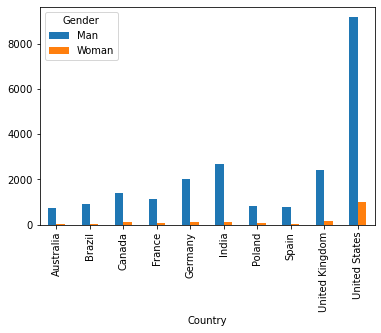

In [34]:
top10 = list(df_survey.groupby('Country', as_index=False)['Age'].count() \
                      .sort_values('Age', ascending=False) \
                      .head(10) \
                      ['Country'])

selected_df = df_survey[df_survey['Country'].isin(top10)]

gender_per_country = selected_df.groupby(['Country', 'Gender'])['Age'].count()

gender_per_country.unstack().plot.bar()